# 회귀분석 
- 회귀 분석은 실젯값과 예측값의 차이를 기반으로 한 지표들을 중심으로 성능 평가 지표
- 실젯값과 예측값의 차이를 구해서 이것들을 단순 합산을 하면 양수와 음수가 섞여있기 때문에 문제 발생 

### MAE
    - 실젯값과 예측값의 차이를 절댓값으로 변환 평균을 구한 값
    - 에러의 크기가 그대로 반영 
    - 이상치에 영향을 받는다. 

### MSE
    - 실젯값과 예측값의 차이를 제곱을 한 값의 평균을 구한 값
    - 실젯값과 예측값의 면적 합을 의미 
    - 이상치에 영향을 받는다. 

### RMSE
    - MSE의 값에 루트를 씌운 값 
    - 에러에 제곱을 하면 에러가 클수록 그에 따른 가중치가 높이 반영
    - 손실이 기하급수적으로 증가하는 상황에서 실제 오류 평균보다 값이 커지는 현상을 상쇄하기 위해 사용

### MSLE
    - 실젯값과 예측값의 차이를 제곱해 평균을 한 값(MSE)에 로그를 적용한 값
    - RMSE와 같이 손실이 기하급수적으로 증가하는 상황에서 실제 오류 평균보다 값이 커지는 현상을 상쇄하기 위해 사용

### MAPE
    - MAE를 퍼센트로 표시 
    - 오차가 예측값에서 차지하는 정도를 나타냄

- 회귀 분석의 순서
1. 모델 선택하고 import 
2. 모델 객체(class)를 생성
3. 모델을 학습 (독립 변수 + 종속 변수)
4. 데이터(독립 변수)를 주고 예측
5. 실제 값과 예측 값을 확인하고 오차를 체크

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
# csv 폴더 안에 있는 boston.csv 파일 로드 
boston = pd.read_csv("../csv/boston.csv")
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


- boston 데이터에서 컬럼
    - CRIM : 범죄율 ( 해당 지역 1인당 범죄 발생 수 )
    - ZN : 25,000 평방피트 이상 주거지역 비율
    - INDUS : 비상업 지역(상업지구 아닌 지역) 토지 비율
    - CHAS : 찰스강 경계 여부 (1 : 경계, 0: 비경계)
    - NOX : 일산화질소 농도 (10ppm 단위)
    - RM : 주택 1가구당 평균 방 개수 
    - AGE : 1940년 이전의 지어진 주택 비율(건물이 30년 이상의 주택 비율)
    - DIS : 작업 중심지(보스턴 5군데)까지의 가중 거리 
    - RAD : 방사형 고속도로 접근성 지수
    - TAX : $10,000 당 제산세율
    - PTRATIO : 지역별 학생-교사 비율
    - B : 인종 지수 (흑인 거주 비율)
    - LSTAT : 저소득층 비율 (%)
    - Price : 주택의 가격의 중앙값 

In [4]:
cols = boston.columns.difference( ['CHAS', 'Price'] )

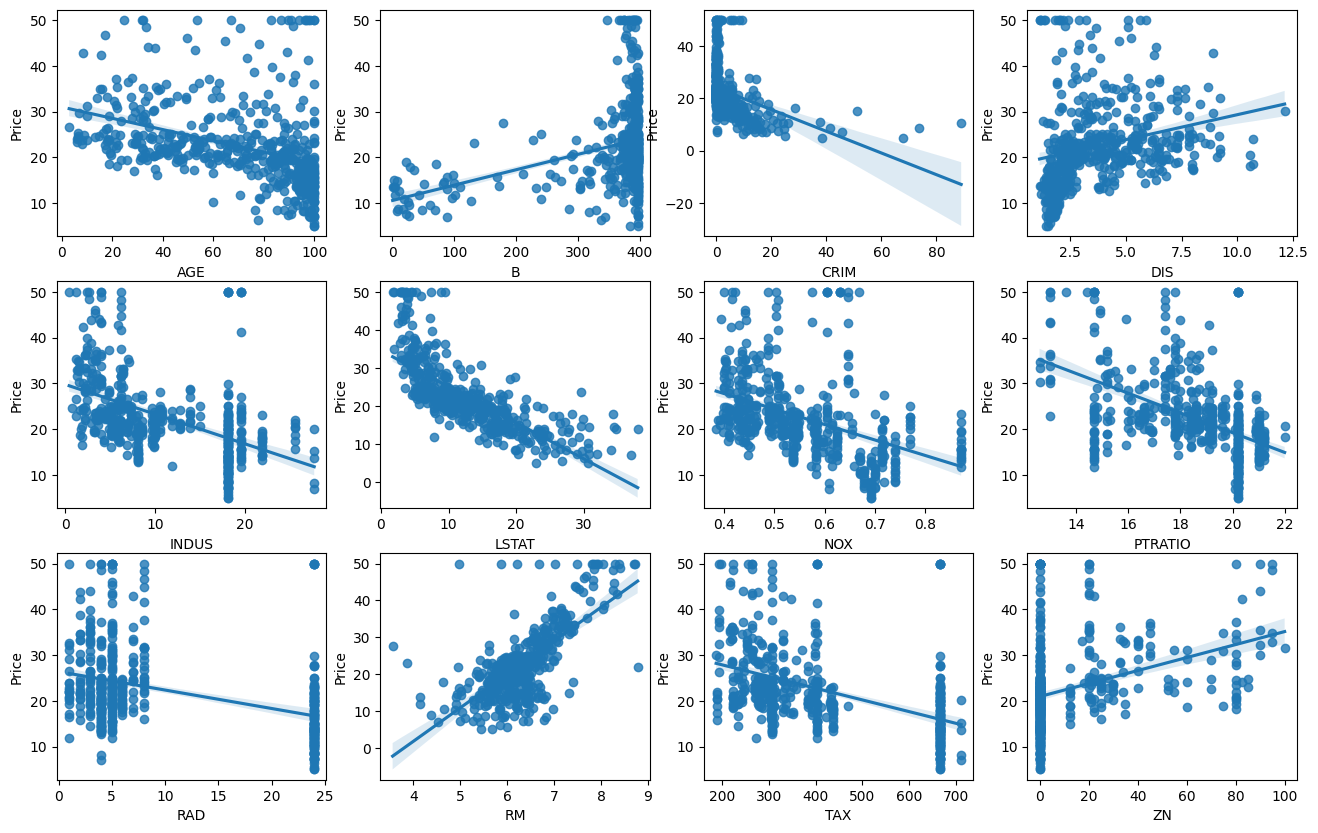

In [5]:
# subplots를 이용하여 Price와 CHAS컬럼을 제외한 나머지 컬럼들 간의 산점도 그래프 
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 10))

# cols를 기준으로 반복문 실행 
for i in range(len(cols)):
    sns.regplot(x = cols[i], y = boston['Price'], data = boston, ax = axes.flat[i])

plt.show()


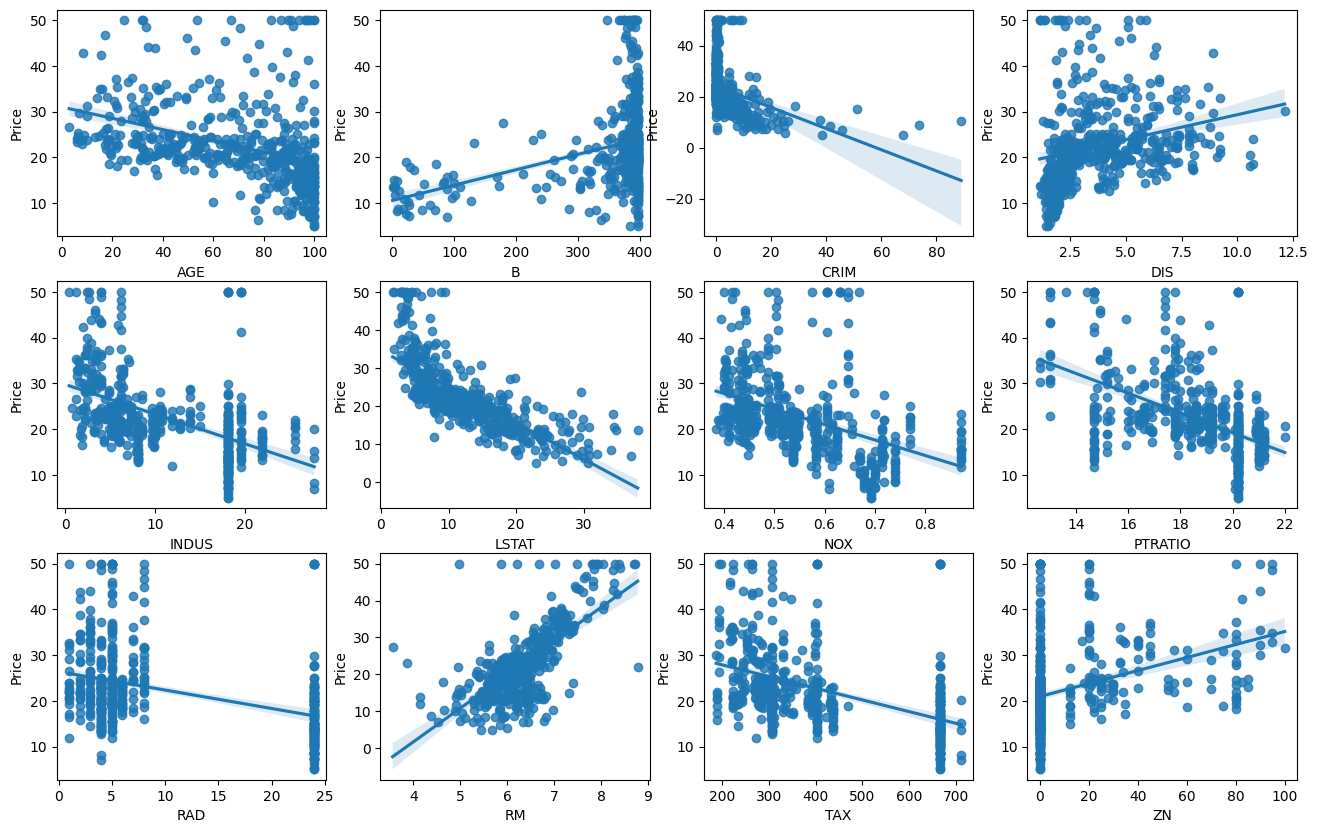

In [6]:
# subplots를 이용하여 Price와 CHAS컬럼을 제외한 나머지 컬럼들 간의 산점도 그래프 
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 10))

# cols를 기준으로 반복문 실행 
for i, col in zip(range(len(cols)), cols):
    sns.regplot(x = col, y = boston['Price'], data = boston, ax = axes.flat[i])

plt.show()

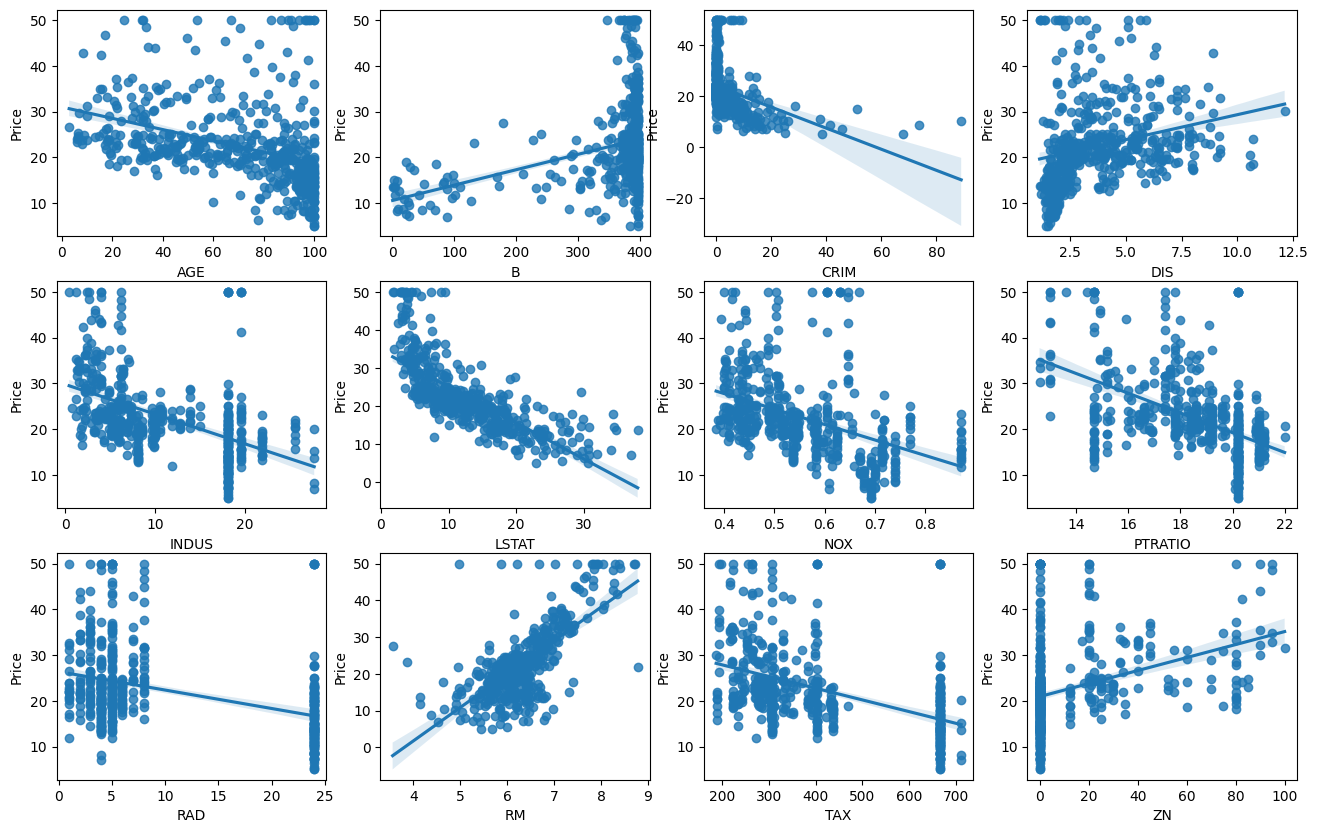

In [7]:
# subplots를 이용하여 Price와 CHAS컬럼을 제외한 나머지 컬럼들 간의 산점도 그래프 
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 10))

# cols를 기준으로 반복문 실행 
for i, column in zip(range(len(cols)), cols):
    # row = i // 4
    row = int(i / 4)
    col = i % 4
    sns.regplot(x = column, y = boston['Price'], data = boston, ax = axes[row][col])

plt.show()

In [8]:
# 모든 컬럼을 기준으로 train, test 데이터셋으로 데이터 분할 
# 독립 변수는 주택의 가격을 제외한 나머지 컬럼들 
X = boston.drop('Price', axis=1).values
Y = boston['Price'].values

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state= 100
)

In [11]:
# 종속변수의 학습 데이터와 평가 데이터의 평균을 확인 
print(Y_train.mean())
print(Y_test.mean())

22.621039603960394
22.18333333333333


In [12]:
# 모델의 선택 
from sklearn.linear_model import LinearRegression

In [13]:
# class(객체)를 생성 
lr = LinearRegression()

In [14]:
# 모델에 학습 -> X_train, Y_train
lr.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [15]:
# 예측 -> 독립 변수중 평가 데이터로 구성된 X_test 데이터를 대입
pred = lr.predict(X_test)

In [16]:
pred_df = pd.DataFrame(pred, columns = ['Pred price'])
actual_df = pd.DataFrame(Y_test, columns = ['Actual price']) 
test_df = pd.DataFrame(X_test, columns = boston.columns.difference(['Price']))

In [17]:
# 두개의 데이터프레임을 단순한 열 결합 
pd.concat( [test_df, pred_df, actual_df], axis = 1 )

,AGE,B,CHAS,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,RM,TAX,ZN,Pred price,Actual price
0,0.03768,80.0,1.52,0.0,0.404,7.274,38.3,7.3090,2.0,329.0,12.6,392.20,6.62,34.408110,34.6
1,0.44178,0.0,6.20,0.0,0.504,6.552,21.4,3.3751,8.0,307.0,17.4,380.34,3.76,31.185246,31.5
2,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,22.312861,20.6
3,1.35472,0.0,8.14,0.0,0.538,6.072,100.0,4.1750,4.0,307.0,21.0,376.73,13.04,17.886139,14.5
4,0.25356,0.0,9.90,0.0,0.544,5.705,77.7,3.9450,4.0,304.0,18.4,396.42,11.50,20.435721,16.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,2.01019,0.0,19.58,0.0,0.605,7.929,96.2,2.0459,5.0,403.0,14.7,369.30,3.70,36.185086,50.0
98,14.23620,0.0,18.10,0.0,0.693,6.343,100.0,1.5741,24.0,666.0,20.2,396.90,20.32,18.010970,7.2
99,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,23.182265,50.0
100,0.29090,0.0,21.89,0.0,0.624,6.174,93.6,1.6119,4.0,437.0,21.2,388.08,24.16,13.772710,14.0


In [18]:
# 평가 지표 생성 
import numpy as np 
from sklearn.metrics import mean_absolute_error, \
    mean_squared_error, mean_squared_log_error, \
    mean_absolute_percentage_error, root_mean_squared_error

In [19]:
mae = mean_absolute_error(Y_test, pred)
mse = mean_squared_error(Y_test, pred)
msle = mean_squared_log_error(Y_test, pred)
mape = mean_absolute_percentage_error(Y_test, pred)
rmse = root_mean_squared_error(Y_test, pred)
rmse2 = np.sqrt(mse)

In [20]:
print("MAE : ", round(mae, 2))
print("MSE : ", round(mse, 2))
print("RMSE : ", round(rmse, 2))
print("RMSE2 : ", round(rmse2, 2))
print('MSLE : ', round(msle, 2))
print('MAPE : ', round(mape, 2) * 100)


MAE :  3.25
MSE :  23.62
RMSE :  4.86
RMSE2 :  4.86
MSLE :  0.05
MAPE :  17.0


In [21]:
from sklearn.metrics import r2_score

# 결정 계수 출력 
r2 = r2_score( Y_test, pred )

print("R2 Score : ", round(r2, 2))

R2 Score :  0.76


In [22]:
# R2-score의 문제 : 컬럼(피쳐)의 개수가 많아지면 R2-Score가 증가하는 경향
# 수정된 R2-Score 생성 
# 1 - ( (1 - r2)*(n - 1) / (n - p - 1) )
# X_test의 인덱스의 수
n = X_test.shape[0]
# X_test의 컬럼의 수
p = X_test.shape[1]

adj_r2 = 1 - ( (1 - r2) * (n - 1) / (n - p - 1) )

print('Adj R2 Score : ', round(adj_r2, 2))


Adj R2 Score :  0.72


In [23]:
# 회귀계수 출력 
print(lr.coef_)

[-8.14896492e-02  4.80407782e-02 -5.47150249e-03  3.06260576e+00
 -1.61368815e+01  3.67245067e+00 -8.51525259e-03 -1.51740854e+00
  2.87271007e-01 -1.21207598e-02 -9.24160757e-01  9.53460812e-03
 -4.85895548e-01]


In [24]:
pd.Series(
    lr.coef_, 
    index = boston.columns.difference(['Price'])
)

AGE        -0.081490
B           0.048041
CHAS       -0.005472
CRIM        3.062606
DIS       -16.136881
INDUS       3.672451
LSTAT      -0.008515
NOX        -1.517409
PTRATIO     0.287271
RAD        -0.012121
RM         -0.924161
TAX         0.009535
ZN         -0.485896
dtype: float64

- 연습 
1. boston 데이터에서 B, CHAS, LSTAT, TAX 컬럼을 제외
2. 독립변수는 Price를 제외한 나머지 데이터
3. 종속변수는 Prcie 데이터 
4. train, test 데이터를 7:3의 비율으로 나눠준다 (random_state는 42 고정)
5. Scaler를 이용하여 train data를 스케일링 (MinMaxScaler)
6. LinearRegression 모델을 이용하여 학습, 예측
7. 실제값과 예측값의 평가 지표를 mae, mse, msle, r2, adj_r2 출력 

In [25]:
df = boston.drop(['B', 'CHAS', 'LSTAT', 'TAX'], axis=1)

In [26]:
X = df.iloc[:, :-1].values
Y = df['Price'].values

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42
)

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
mmscaler = MinMaxScaler()

In [30]:
mmscaler.fit(X_train)

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [31]:
X_train_sc = mmscaler.transform(X_train)
X_test_sc = mmscaler.transform(X_test)

In [32]:
lr = LinearRegression()

In [33]:
lr.fit(X_train_sc, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [34]:
pred_sc = lr.predict(X_test_sc)

In [35]:
mae_sc = mean_absolute_error(Y_test, pred_sc)
mse_sc = mean_squared_error(Y_test, pred_sc)
msle_sc = mean_squared_log_error(Y_test, pred_sc)
r2_sc = r2_score(Y_test, pred_sc)

n = X_test_sc.shape[0]
p = X_test_sc.shape[1]
adj_r2_sc = 1 - ( (1-r2_sc)*(n - 1) / (n - p - 1) ) 

In [36]:
print(round(mae, 2), round(mae_sc, 2))
print(round(mse, 2), round(mse_sc, 2))
print(round(msle, 2), round(msle_sc, 2))
print(round(r2, 2), round(r2_sc, 2))
print(round(adj_r2, 2), round(adj_r2_sc, 2))

3.25 3.29
23.62 24.66
0.05 0.15
0.76 0.67
0.72 0.65


In [37]:
boston.corr(method='pearson')['Price'].abs().sort_values(ascending=False)

Price      1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: Price, dtype: float64